In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
model = LinearRegression()

In [5]:
df = sns.load_dataset('flights')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [7]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [8]:
df['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [9]:
df['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

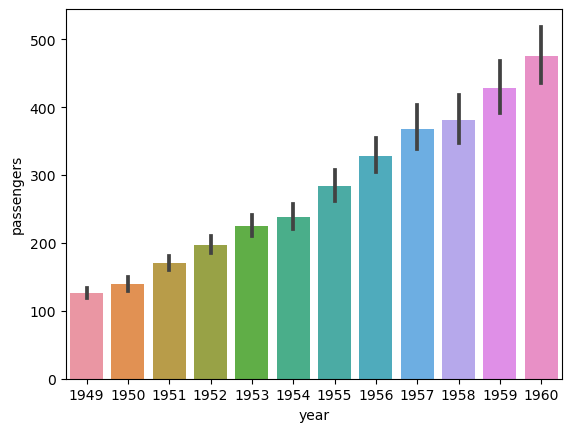

In [10]:
sns.barplot(x = 'year', y = 'passengers', data = df)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['year'], df['passengers'], train_size = 0.7)

In [12]:
X_train.head()

51     1953
62     1954
102    1957
11     1949
5      1949
Name: year, dtype: int64

In [13]:
X_test.head()

67     1954
18     1950
52     1953
116    1958
84     1956
Name: year, dtype: int64

In [14]:
y_train.head()

51     235
62     235
102    465
11     118
5      135
Name: passengers, dtype: int64

In [15]:
y_test.head()

67     293
18     170
52     229
116    404
84     284
Name: passengers, dtype: int64

In [24]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred = np.round(y_pred)

In [28]:
y_pred

array([263., 139., 232., 387., 325., 294., 232., 201., 232., 170., 170.,
       201., 170., 325., 294., 449., 108., 263., 387., 449., 356., 201.,
       449., 418., 356., 387., 108., 449., 449., 232., 387., 139., 294.,
       356., 418., 294., 387., 325., 294., 418., 232., 201., 418., 356.])

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_squared_log_error(y_test, y_pred))

0.8279093143239311 37.90909090909091 2550.9545454545455 0.02000161303377065


In [42]:
sns.scatterplot(x = X_test.ravel(), y = y_test, hue = df['year'])
sns.lineplot(x = X_test.ravel(), y = y_pred)
plt.show()

ValueError: array length 44 does not match index length 144